In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#проверка на долю пропусков
df = pd.read_csv('dsc_salary_2025_train.csv', encoding='utf-8')

X = df.drop('salary_class', axis=1)
y = df['salary_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train_test = pd.read_csv('dsc_salary_2025_test.csv', encoding='utf-8')

pd.set_option('display.max_columns', None)

In [70]:
#сразу удаление ненужных столбцов

X_train = X_train.drop(columns= ['noise_feature_1', 'noise_feature_2', 'noise_feature_3', 'noise_feature_4', 'noise_feature_5', 'first_name'])
X_test = X_test.drop(columns= ['noise_feature_1', 'noise_feature_2', 'noise_feature_3', 'noise_feature_4', 'noise_feature_5', 'first_name'])
x_train_test = x_train_test.drop(columns= ['noise_feature_1', 'noise_feature_2', 'noise_feature_3', 'noise_feature_4', 'noise_feature_5', 'first_name'])

In [71]:
#заполнение пропусков

median_courses = X_train['courses_count'].median()
X_train['courses_count'] = X_train['courses_count'].fillna(median_courses)
X_test['courses_count'] = X_test['courses_count'].fillna(median_courses)
x_train_test['courses_count'] = x_train_test['courses_count'].fillna(median_courses)


median_gpa = X_train['gpa'].median()
X_train['gpa'] = X_train['gpa'].fillna(median_gpa)
X_test['gpa'] = X_test['gpa'].fillna(median_gpa)
x_train_test['gpa'] = x_train_test['gpa'].fillna(median_gpa)

mode_eng = X_train['english_level'].mode()[0]
X_train['english_level'] = X_train['english_level'].fillna(mode_eng)
X_test['english_level'] = X_test['english_level'].fillna(mode_eng)
x_train_test['english_level'] = x_train_test['english_level'].fillna(mode_eng)

median_comm = X_train['communication_score'].median()
X_train['communication_score'] = X_train['communication_score'].fillna(median_comm)
X_test['communication_score'] = X_test['communication_score'].fillna(median_comm)
x_train_test['communication_score'] = x_train_test['communication_score'].fillna(median_comm)

median_team = X_train['teamworks_score'].median()
X_train['teamworks_score'] = X_train['teamworks_score'].fillna(median_team)
X_test['teamworks_score'] = X_test['teamworks_score'].fillna(median_team)
x_train_test['teamworks_score'] = x_train_test['teamworks_score'].fillna(median_team)

x_train_test.isna().sum()

,0
Unnamed: 0,0
id,0
hackathons_count,0
courses_count,0
pet_projects_count,0
leetcode_solved,0
hours_study_per_week,0
months_with_mentor,0
gpa,0
internship,0


In [72]:
X_train['internship'] = X_train['internship'].replace({'Yes': 1, 'No': 0}).astype(int)
X_test['internship'] = X_test['internship'].replace({'Yes': 1, 'No': 0}).astype(int)
x_train_test['internship'] = x_train_test['internship'].replace({'Yes': 1, 'No': 0}).astype(int)
X_train['hackathons_winner'] = X_train['hackathons_winner'].replace({'Yes': 1, 'No': 0}).astype(int)
X_test['hackathons_winner'] = X_test['hackathons_winner'].replace({'Yes': 1, 'No': 0}).astype(int)
x_train_test['hackathons_winner'] = x_train_test['hackathons_winner'].replace({'Yes': 1, 'No': 0}).astype(int)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12800 entries, 676 to 7270
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       12800 non-null  int64  
 1   id                               12800 non-null  int64  
 2   hackathons_count                 12800 non-null  int64  
 3   courses_count                    12800 non-null  float64
 4   pet_projects_count               12800 non-null  int64  
 5   leetcode_solved                  12800 non-null  int64  
 6   hours_study_per_week             12800 non-null  float64
 7   months_with_mentor               12800 non-null  int64  
 8   gpa                              12800 non-null  float64
 9   internship                       12800 non-null  int64  
 10  is_mentor                        12800 non-null  object 
 11  english_level                    12800 non-null  object 
 12  specialization        

/tmp/ipython-input-4052678298.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['internship'] = X_train['internship'].replace({'Yes': 1, 'No': 0}).astype(int)
/tmp/ipython-input-4052678298.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['internship'] = X_test['internship'].replace({'Yes': 1, 'No': 0}).astype(int)
/tmp/ipython-input-4052678298.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_ob

In [73]:
X_train['total_activities'] = X_train['hackathons_count'] + X_train['courses_count'] + X_train['pet_projects_count'] + X_train['events_attended']
X_test['total_activities'] = X_test['hackathons_count'] + X_test['courses_count'] + X_test['pet_projects_count'] + X_test['events_attended']
x_train_test['total_activities'] = x_train_test['hackathons_count'] + x_train_test['courses_count'] + x_train_test['pet_projects_count'] + x_train_test['events_attended']

X_train['competitive_score'] = X_train['hackathons_count'] * 1.5 + X_train['hackathons_winner']
X_test['competitive_score'] = X_test['hackathons_count'] * 1.5 + X_test['hackathons_winner']
x_train_test['competitive_score'] = x_train_test['hackathons_count'] * 1.5 + x_train_test['hackathons_winner']

X_train['tech_score_weighted'] = (0.4 * X_train['coding_skill']) + (0.3 * X_train['ml_theory_score']) + (0.2 * X_train['math_score']) + (0.1 * X_train['leetcode_solved'] / 100)
X_test['tech_score_weighted'] = (0.4 * X_test['coding_skill']) + (0.3 * X_test['ml_theory_score']) + (0.2 * X_test['math_score']) + (0.1 * X_test['leetcode_solved'] / 100)
x_train_test['tech_score_weighted'] = (0.4 * x_train_test['coding_skill']) + (0.3 * x_train_test['ml_theory_score']) + (0.2 * x_train_test['math_score']) + (0.1 * x_train_test['leetcode_solved'] / 100)

X_train['soft_skills_score'] = (0.4 * X_train['communication_score']) + (0.4 * X_train['teamworks_score']) + (0.2 * X_train['motivation_score'])
X_test['soft_skills_score'] = (0.4 * X_test['communication_score']) + (0.4 * X_test['teamworks_score']) + (0.2 * X_test['motivation_score'])
x_train_test['soft_skills_score'] = (0.4 * x_train_test['communication_score']) + (0.4 * x_train_test['teamworks_score']) + (0.2 * x_train_test['motivation_score'])

max_total_activities_train = X_train['total_activities'].max()

X_train['overall_readiness'] = (0.3 * X_train['tech_score_weighted']) + (0.3 * X_train['soft_skills_score']) + (0.2 * X_train['gpa'] / 10) + (0.1 * X_train['internship']) + (0.1 * X_train['total_activities'] / max_total_activities_train)
X_test['overall_readiness'] = (0.3 * X_test['tech_score_weighted']) + (0.3 * X_test['soft_skills_score']) + (0.2 * X_test['gpa'] / 10) + (0.1 * X_test['internship']) + (0.1 * X_test['total_activities'] / max_total_activities_train)
x_train_test['overall_readiness'] = (0.3 * x_train_test['tech_score_weighted']) + (0.3 * x_train_test['soft_skills_score']) + (0.2 * x_train_test['gpa'] / 10) + (0.1 * x_train_test['internship']) + (0.1 * x_train_test['total_activities'] / max_total_activities_train)

<Axes: title={'center': 'correlations map'}>

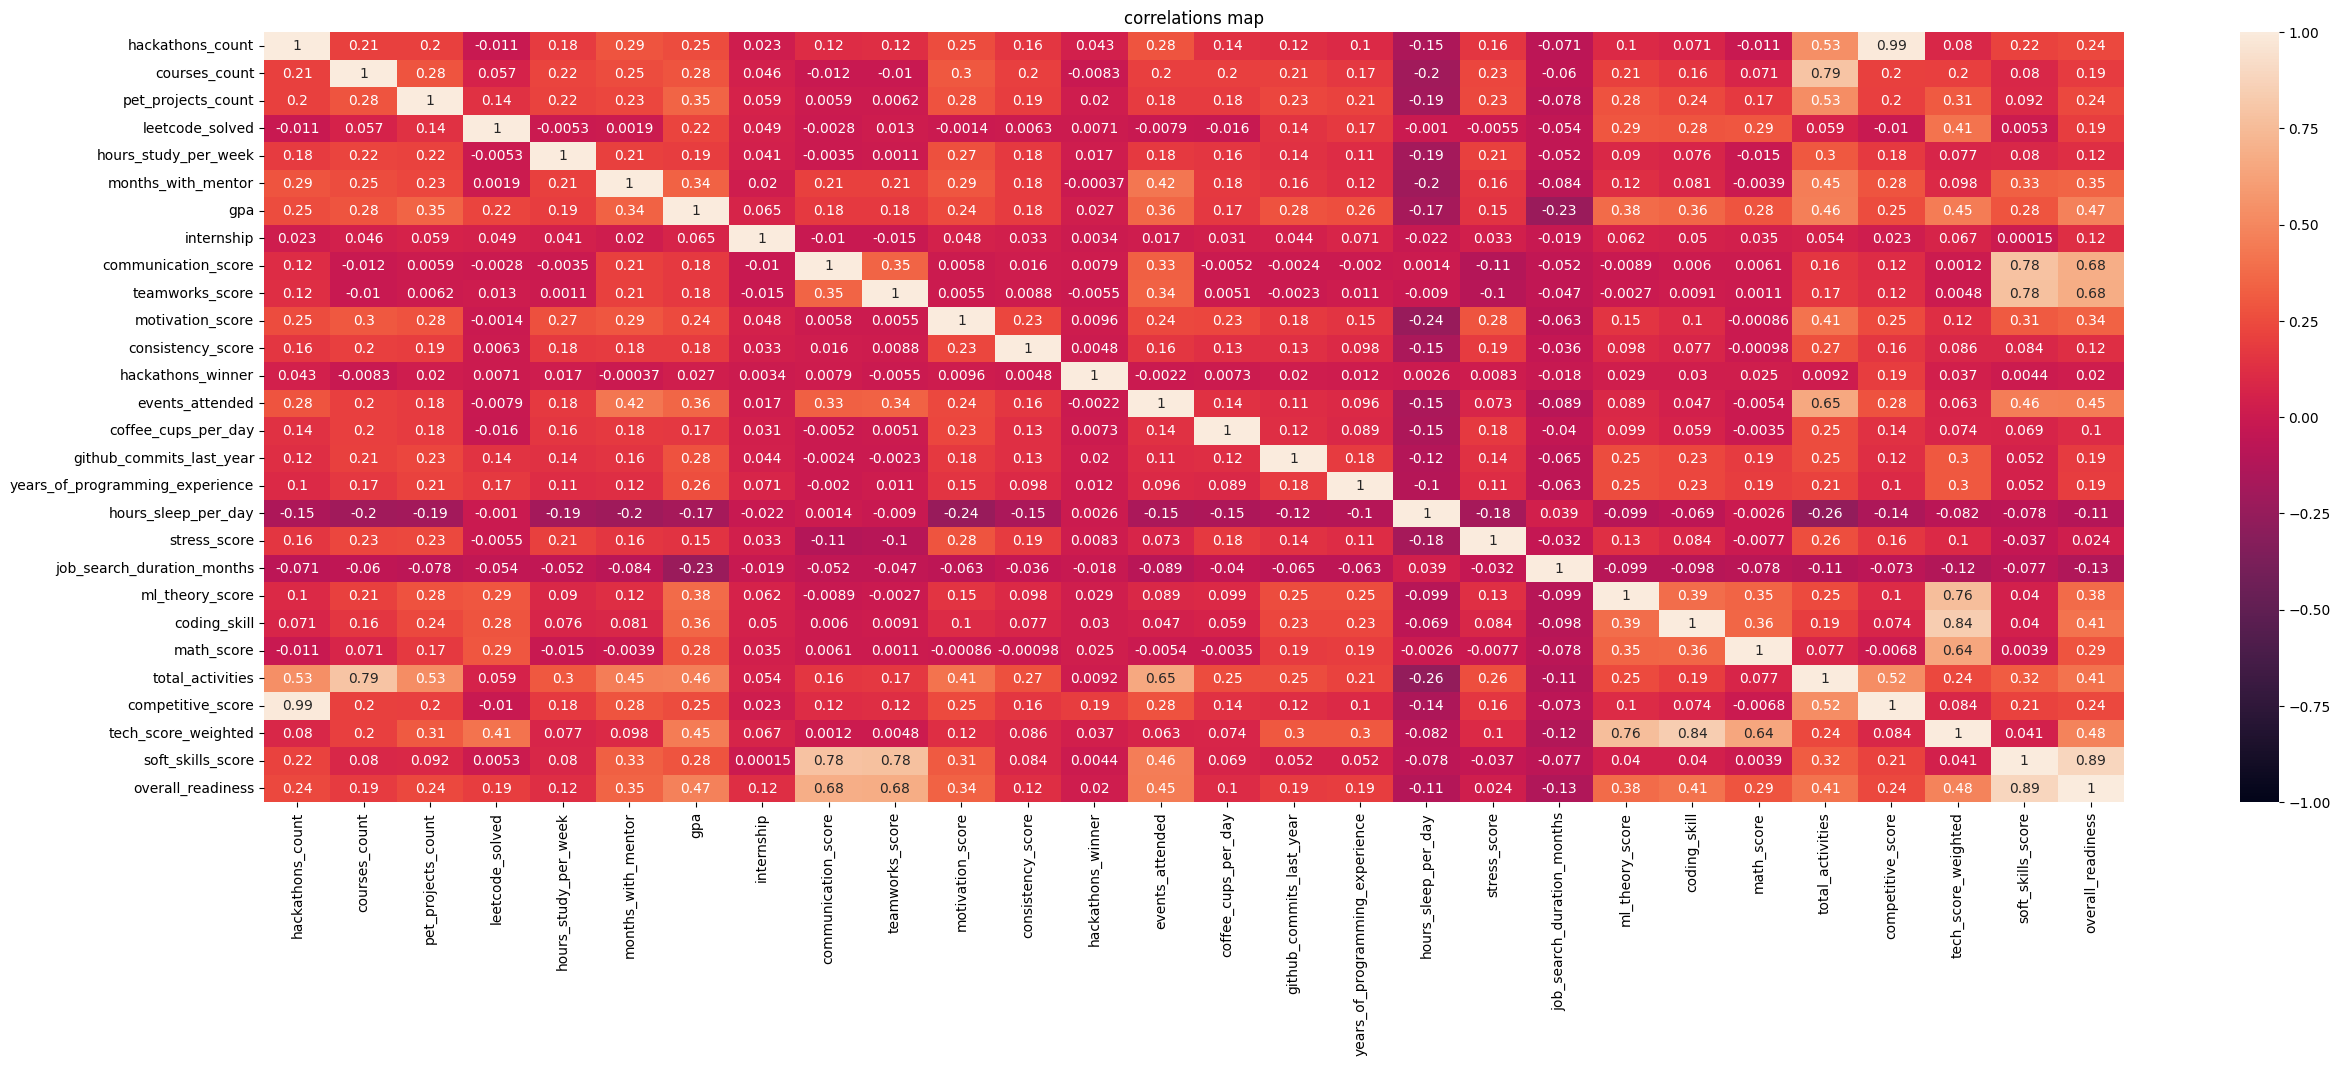

In [74]:
#проверка корреляции столбцов

df_numeric = X_train.drop(columns=['Unnamed: 0', 'id'], errors='ignore').select_dtypes(include=np.number)
plt.figure(figsize=(30, 10))
plt.title('correlations map')
sns.heatmap(df_numeric.corr(), vmax = 1, vmin = -1, annot = True)

#высоких корреляций нет, значит удаление столбцов для избежания мультиколлинеарности не нужно

In [75]:
#кодирование категориальных признаков

df_obj = X_train.select_dtypes(include=np.object_)
df_obj = df_obj.columns.tolist()

X_train_gd = pd.get_dummies(X_train, columns=df_obj, drop_first=True, dtype=int)
X_test_gd = pd.get_dummies(X_test, columns=df_obj, drop_first=True, dtype=int)

all_columns = X_train_gd.columns.union(X_test_gd.columns)
X_train_gd = X_train_gd.reindex(columns=all_columns, fill_value=0)
X_test_gd = X_test_gd.reindex(columns=all_columns, fill_value=0)

X_train_gd.shape
X_train_gd.head()

,Unnamed: 0,id,hackathons_count,courses_count,pet_projects_count,leetcode_solved,hours_study_per_week,months_with_mentor,gpa,internship,communication_score,teamworks_score,motivation_score,consistency_score,hackathons_winner,events_attended,coffee_cups_per_day,github_commits_last_year,years_of_programming_experience,hours_sleep_per_day,stress_score,job_search_duration_months,ml_theory_score,coding_skill,math_score,total_activities,competitive_score,tech_score_weighted,soft_skills_score,overall_readiness,is_mentor_Yes,english_level_A2,english_level_B1,english_level_B2,english_level_C1,specialization_DA,specialization_DE,specialization_ML,specialization_NLP,head_of_department_Yes,was_speaker_Yes,bot_month_Yes,attends_club_meetups_regularly_Yes,takes_part_in_memes_Yes,takes_part_in_informal_meetings_Yes
676,676,676,1,8.0,0,112,16.596806,3,3.659771,1,1.558656,3.075511,7.101916,4.514741,0,0,1,42,2,7.361014,4.387472,6,3.974463,3.377475,5.000000,9.0,1.5,3.655329,3.274050,2.274509,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
12113,12113,12113,3,17.0,3,36,35.614170,6,4.855288,1,6.223607,6.453840,10.000000,10.000000,0,10,3,116,2,4.645812,4.257104,11,3.893549,5.000000,4.822008,33.0,4.5,4.168466,7.070979,3.651439,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
7077,7077,7077,1,3.0,0,53,11.884426,2,3.270977,0,10.000000,6.028348,0.948327,0.860571,0,2,1,6,6,7.252612,2.226120,4,3.320132,3.697155,3.278705,6.0,1.5,3.183643,6.601005,3.015814,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
13005,13005,13005,0,4.0,0,50,17.439082,2,3.512083,0,5.033686,3.843952,1.438492,5.519366,0,1,3,60,4,6.976390,1.991487,0,2.766766,2.528599,1.574018,5.0,0.0,2.206273,3.838754,1.896250,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
12123,12123,12123,4,1.0,0,10,31.705317,1,3.512083,0,5.029476,5.027407,2.786021,5.795189,0,3,0,0,3,5.643572,1.163327,2,1.761360,1.000000,1.000000,8.0,6.0,1.138408,4.579957,1.805751,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1


In [76]:
#нормализация числовых признаков

df_num = X_train.select_dtypes(include=np.number).columns.tolist()

X_train_scaled = X_train_gd.copy()
X_test_scaled = X_test_gd.copy()

scaler = MinMaxScaler()

X_train_scaled[df_num] = scaler.fit_transform(X_train_gd[df_num])

X_test_scaled[df_num] = scaler.transform(X_test_gd[df_num])

X_train_scaled[df_num].head()

,Unnamed: 0,id,hackathons_count,courses_count,pet_projects_count,leetcode_solved,hours_study_per_week,months_with_mentor,gpa,internship,communication_score,teamworks_score,motivation_score,consistency_score,hackathons_winner,events_attended,coffee_cups_per_day,github_commits_last_year,years_of_programming_experience,hours_sleep_per_day,stress_score,job_search_duration_months,ml_theory_score,coding_skill,math_score,total_activities,competitive_score,tech_score_weighted,soft_skills_score,overall_readiness
676,0.042193,0.042193,0.1,0.40,0.0,0.391608,0.280682,0.15,0.463908,1.0,0.155866,0.307551,0.710192,0.451474,0.0,0.0000,0.2,0.164062,0.166667,0.560169,0.846868,0.285714,0.743616,0.594369,1.000000,0.225,0.09375,0.730398,0.319248,0.440499
12113,0.757095,0.757095,0.3,0.85,0.3,0.125874,0.602300,0.30,0.942115,1.0,0.622361,0.645384,1.000000,1.000000,0.0,0.6250,0.6,0.453125,0.166667,0.107635,0.814276,0.523810,0.723387,1.000000,0.955502,0.825,0.28125,0.866472,0.709374,0.792454
7077,0.442305,0.442305,0.1,0.15,0.0,0.185315,0.200987,0.10,0.308391,0.0,1.000000,0.602835,0.094833,0.086057,0.0,0.1250,0.2,0.023438,0.500000,0.542102,0.306530,0.190476,0.580033,0.674289,0.569676,0.150,0.09375,0.605315,0.661085,0.629983
13005,0.812852,0.812852,0.0,0.20,0.0,0.174825,0.294926,0.10,0.404833,0.0,0.503369,0.384395,0.143849,0.551937,0.0,0.0625,0.6,0.234375,0.333333,0.496065,0.247872,0.000000,0.441691,0.382150,0.143505,0.125,0.00000,0.346134,0.377270,0.343813
12123,0.757720,0.757720,0.4,0.05,0.0,0.034965,0.536194,0.05,0.404833,0.0,0.502948,0.502741,0.278602,0.579519,0.0,0.1875,0.0,0.000000,0.250000,0.273929,0.040832,0.095238,0.190340,0.000000,0.000000,0.200,0.37500,0.062956,0.453427,0.320680


In [77]:
from sklearn.metrics import f1_score
import xgboost as xgb

def mod(X_train, y_train, X_val, y_val):

    from sklearn.utils.class_weight import compute_class_weight
    classes = np.unique(y_train)
    weights = compute_class_weight('balanced', classes=classes, y=y_train)
    sample_weights = np.array([weights[class_idx] for class_idx in y_train])

    model = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=len(classes),
        eval_metric='mlogloss',
        n_estimators=7000,
        early_stopping_rounds = 150,
        learning_rate=0.03,
        max_depth=2,
        subsample=0.6,
        colsample_bytree=0.6,
        min_child_weight=2,
        reg_lambda=10,
        reg_alpha=2,
        random_state=42,
        n_jobs=-1,
        tree_method='hist'
    )


    model.fit(
        X_train, y_train,
        sample_weight=sample_weights,
        eval_set=[(X_val, y_val)],
        verbose=True
    )

    return model

In [78]:
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = [c for c in X_train.columns if c not in categorical_cols]

categorical_cols

['is_mentor',
 'english_level',
 'specialization',
 'head_of_department',
 'was_speaker',
 'bot_month',
 'attends_club_meetups_regularly',
 'takes_part_in_memes',
 'takes_part_in_informal_meetings']

In [79]:
pip install catboost

In [80]:
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostClassifier



categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    x_train_test[col]  = le.transform(x_train_test[col].astype(str))
    label_encoders[col] = le

cat_idx = [X_train.columns.get_loc(c) for c in categorical_features]



classes = np.unique(y_train)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weights = class_weights.tolist()

print("Class weights:", class_weights)



model = CatBoostClassifier(
    loss_function='MultiClass',
    eval_metric='TotalF1',

    iterations=1500, #3000
    learning_rate=0.05, #0.05
    depth=4, #4

    l2_leaf_reg=6,
    random_strength=1.0,
    bagging_temperature=0.5,
    border_count=254,

    class_weights=class_weights,
    random_seed=42,
    verbose=200,
)


model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_idx,
    use_best_model=True
)


preds = model.predict(x_train_test)
preds = preds.astype(int).flatten()







Class weights: [0.505369551484523, 0.819252432155658, 1.6469377251672672, 5.169628432956381]
0:	learn: 0.5682539	test: 0.5870713	best: 0.5870713 (0)	total: 103ms	remaining: 2m 35s
200:	learn: 0.7747077	test: 0.7687283	best: 0.7687283 (200)	total: 25.9s	remaining: 2m 47s
400:	learn: 0.8265670	test: 0.7830969	best: 0.7859581 (379)	total: 35.7s	remaining: 1m 37s
600:	learn: 0.8528051	test: 0.7868332	best: 0.7905183 (524)	total: 44.2s	remaining: 1m 6s
800:	learn: 0.8717430	test: 0.7757791	best: 0.7905183 (524)	total: 52.9s	remaining: 46.2s
1000:	learn: 0.8844877	test: 0.7774489	best: 0.7905183 (524)	total: 1m 1s	remaining: 30.5s
1200:	learn: 0.8948465	test: 0.7757319	best: 0.7905183 (524)	total: 1m 9s	remaining: 17.2s
1400:	learn: 0.9047102	test: 0.7729473	best: 0.7905183 (524)	total: 1m 18s	remaining: 5.52s
1499:	learn: 0.9088197	test: 0.7690401	best: 0.7905183 (524)	total: 1m 21s	remaining: 0us

bestTest = 0.7905183391
bestIteration = 524

Shrink model to first 525 iterations.


In [81]:
df_sub = pd.DataFrame({
    "id": np.arange(len(preds)),
    "pred_value": preds
})
df_sub.shape
from google.colab import files


df_sub[['id', 'pred_value']].to_csv('predictions2.csv', index=False)

files.download('predictions2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>